In [ ]:
#Task 1: Data Preparation

In [1]:
import numpy as np
import pandas as pd

In [2]:
#Task 1.1: Data Retrieving

In [3]:
starwarsdf = pd.read_csv("StarWars.csv",encoding="ISO-8859-1")

In [4]:
starwarsdf.shape

(1187, 38)

In [5]:
starwarsdf.head(2)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic


In [6]:
#Task 1.2: Check data types

In [7]:
starwarsdf.dtypes

RespondentID                                                                                                                                     float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                      object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                             object
Which of the following Star Wars films have you seen? Please select all that apply.                                                               object
Unnamed: 4                                                                                                                                        object
Unnamed: 5                                                                                                                                        object
Unnamed: 6                                                                        

In [8]:
#Task 1.3: Typos

In [9]:
starwarsdf["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False)

Yes         551
NaN         350
No          283
Yess          1
Noo           1
Response      1
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [10]:
starwarsdf = starwarsdf.replace('Yess', 'Yes')
starwarsdf = starwarsdf.replace('Noo', 'No')

In [11]:
starwarsdf["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False)

Yes         552
NaN         350
No          284
Response      1
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [12]:
starwarsdf["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False)

Yes         935
No          250
Yes           1
Response      1
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [13]:
starwarsdf = starwarsdf.replace('Yes ', 'Yes')

In [14]:
starwarsdf["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False)

Yes         936
No          250
Response      1
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [15]:
starwarsdf['Gender'].value_counts(dropna=False)

Female      546
Male        496
NaN         140
female        2
F             1
male          1
Response      1
Name: Gender, dtype: int64

In [16]:
starwarsdf = starwarsdf.replace('F', 'Female')
starwarsdf = starwarsdf.replace('male', 'Male')
starwarsdf = starwarsdf.replace('female', 'Female')

In [17]:
starwarsdf['Gender'].value_counts(dropna=False)

Female      549
Male        497
NaN         140
Response      1
Name: Gender, dtype: int64

In [18]:
#1.4: Extra-whitespaces

In [19]:
s=starwarsdf.select_dtypes(include=['object'])

In [20]:
for attributes in s: 
    starwarsdf[attributes]=starwarsdf[attributes].str.strip()
    print(starwarsdf[attributes].unique())

['Response' 'Yes' 'No']
['Response' 'Yes' nan 'No']
['Star Wars: Episode I  The Phantom Menace' nan]
['Star Wars: Episode II  Attack of the Clones' nan]
['Star Wars: Episode III  Revenge of the Sith' nan]
['Star Wars: Episode IV  A New Hope' nan]
['Star Wars: Episode V The Empire Strikes Back' nan]
['Star Wars: Episode VI Return of the Jedi' nan]
['Star Wars: Episode I  The Phantom Menace' '3' nan '1' '5' '6' '4' '2']
['Star Wars: Episode II  Attack of the Clones' '2' nan '6' '4' '5' '1' '3']
['Star Wars: Episode III  Revenge of the Sith' '1' nan '3' '6' '4' '5' '2']
['Star Wars: Episode IV  A New Hope' '4' nan '2' '6' '3' '1' '5']
['Star Wars: Episode V The Empire Strikes Back' '5' nan '4' '1' '2' '3'
 '6']
['Star Wars: Episode VI Return of the Jedi' '6' nan '3' '2' '1' '4' '5']
['Han Solo' 'Very favorably' nan 'Somewhat favorably'
 'Neither favorably nor unfavorably (neutral)' 'Somewhat unfavorably'
 'Unfamiliar (N/A)' 'Very unfavorably']
['Luke Skywalker' 'Very favorably' nan 'Somew

In [ ]:
#1.5: Upper/Lower-case

In [23]:
for attributes in s: 
    starwarsdf[attributes]=starwarsdf[attributes].str.upper()
    print(starwarsdf[attributes].unique())

['RESPONSE' 'YES' 'NO']
['RESPONSE' 'YES' nan 'NO']
['STAR WARS: EPISODE I  THE PHANTOM MENACE' nan]
['STAR WARS: EPISODE II  ATTACK OF THE CLONES' nan]
['STAR WARS: EPISODE III  REVENGE OF THE SITH' nan]
['STAR WARS: EPISODE IV  A NEW HOPE' nan]
['STAR WARS: EPISODE V THE EMPIRE STRIKES BACK' nan]
['STAR WARS: EPISODE VI RETURN OF THE JEDI' nan]
['STAR WARS: EPISODE I  THE PHANTOM MENACE' '3' nan '1' '5' '6' '4' '2']
['STAR WARS: EPISODE II  ATTACK OF THE CLONES' '2' nan '6' '4' '5' '1' '3']
['STAR WARS: EPISODE III  REVENGE OF THE SITH' '1' nan '3' '6' '4' '5' '2']
['STAR WARS: EPISODE IV  A NEW HOPE' '4' nan '2' '6' '3' '1' '5']
['STAR WARS: EPISODE V THE EMPIRE STRIKES BACK' '5' nan '4' '1' '2' '3'
 '6']
['STAR WARS: EPISODE VI RETURN OF THE JEDI' '6' nan '3' '2' '1' '4' '5']
['HAN SOLO' 'VERY FAVORABLY' nan 'SOMEWHAT FAVORABLY'
 'NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)' 'SOMEWHAT UNFAVORABLY'
 'UNFAMILIAR (N/A)' 'VERY UNFAVORABLY']
['LUKE SKYWALKER' 'VERY FAVORABLY' nan 'SOMEW

In [24]:
starwarsdf.describe()

,RespondentID
count,1.186000e+03
mean,3.290128e+09
std,1.055639e+06
min,3.288373e+09
25%,3.289451e+09
50%,3.290147e+09
75%,3.290814e+09
max,3.292880e+09


In [25]:
#1.6: Sanity checks

In [26]:
starwarsdf['Age'].value_counts(dropna=False)

45-60       291
> 60        269
30-44       268
18-29       217
NaN         140
RESPONSE      1
500           1
Name: Age, dtype: int64

In [27]:
starwarsdf['Age']=starwarsdf['Age'].replace('500',np.NaN)

In [28]:
starwarsdf['Age'].value_counts(dropna=False)

45-60       291
> 60        269
30-44       268
18-29       217
NaN         141
RESPONSE      1
Name: Age, dtype: int64

In [29]:
starwarsdf = starwarsdf[starwarsdf["RespondentID"].notnull()]

In [30]:
starwarsdf.shape

(1186, 38)

In [31]:
#Task 1.7: Missing values

In [32]:
starwarsdf.isnull()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,True,True,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1183,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1184,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,False,False,False,False,False,False
1185,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [33]:
#2.1: Explore a survey question

In [34]:
starwarsdf.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [90]:
map={
    "Star Wars: Episode I  The Phantom Menace":True,np.nan:False,
    "Star Wars: Episode II  Attack of the Clones":True,
    "Star Wars: Episode III  Revenge of the Sith":True,
    "Star Wars: Episode IV  A New Hope":True,
    "Star Wars: Episode V The Empire Strikes Back":True,
    "Star Wars: Episode VI Return of the Jedi":True      
}

for col in starwarsdf.columns[3:9]:
    starwarsdf[col]=starwarsdf[col].map(map)

In [37]:
starwarsdf=starwarsdf.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.":"Seen1",
    "Unnamed: 4":"Seen2",
    "Unnamed: 5":"Seen3",
    "Unnamed: 6":"Seen4",
    "Unnamed: 7":"Seen5",
    "Unnamed: 8":"Seen6",
})

In [38]:
starwarsdf[starwarsdf.columns[9:15]] = starwarsdf[starwarsdf.columns[9:15]].astype(float)

In [39]:
starwarsdf.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Seen1,Seen2,Seen3,Seen4,Seen5,Seen6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,YES,YES,False,False,False,False,False,False,3.0,...,VERY FAVORABLY,I DON'T UNDERSTAND THIS QUESTION,YES,NO,NO,MALE,18-29,NaN,HIGH SCHOOL DEGREE,SOUTH ATLANTIC
2,3.292880e+09,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,YES,MALE,18-29,"$0 - $24,999",BACHELOR DEGREE,WEST SOUTH CENTRAL
3,3.292765e+09,YES,NO,False,False,False,NaN,NaN,NaN,1.0,...,UNFAMILIAR (N/A),I DON'T UNDERSTAND THIS QUESTION,NO,NaN,NO,MALE,18-29,"$0 - $24,999",HIGH SCHOOL DEGREE,WEST NORTH CENTRAL
4,3.292763e+09,YES,YES,False,False,False,False,False,False,5.0,...,VERY FAVORABLY,I DON'T UNDERSTAND THIS QUESTION,NO,NaN,YES,MALE,18-29,"$100,000 - $149,999",SOME COLLEGE OR ASSOCIATE DEGREE,WEST NORTH CENTRAL
5,3.292731e+09,YES,YES,False,False,False,False,False,False,5.0,...,SOMEWHAT FAVORABLY,GREEDO,YES,NO,NO,MALE,18-29,"$100,000 - $149,999",SOME COLLEGE OR ASSOCIATE DEGREE,WEST NORTH CENTRAL


In [40]:

starwarsdf = starwarsdf.rename(columns={
"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "Ranking1",
        "Unnamed: 10": "Ranking2",
        "Unnamed: 11": "Ranking3",
        "Unnamed: 12": "Ranking4",
        "Unnamed: 13": "Ranking5",
        "Unnamed: 14": "Ranking6"
        })

starwarsdf.head(0)[9:15]

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Seen1,Seen2,Seen3,Seen4,Seen5,Seen6,Ranking1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)


In [41]:
starwarsdf[starwarsdf.columns[9:15]].mean()

Ranking1    3.732934
Ranking2    4.087321
Ranking3    4.341317
Ranking4    3.272727
Ranking5    2.513158
Ranking6    3.047847
dtype: float64

In [42]:
#2.2: Relationships between columns

In [43]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

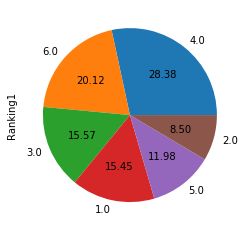

In [44]:
starwarsdf['Ranking1'].value_counts().plot(kind='pie',autopct='%.2f')

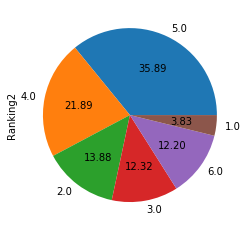

In [45]:
starwarsdf['Ranking2'].value_counts().plot(kind='pie',autopct='%.2f')

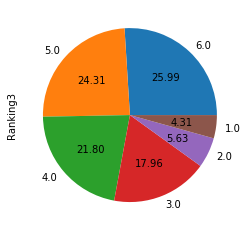

In [46]:
starwarsdf['Ranking3'].value_counts().plot(kind='pie',autopct='%.2f')

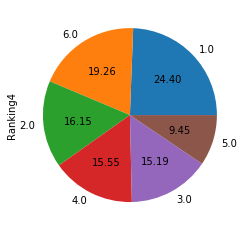

In [47]:
starwarsdf['Ranking4'].value_counts().plot(kind='pie',autopct='%.2f')

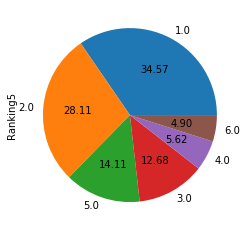

In [48]:
starwarsdf['Ranking5'].value_counts().plot(kind='pie',autopct='%.2f')

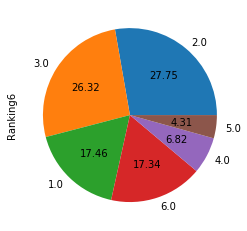

In [49]:
starwarsdf['Ranking6'].value_counts().plot(kind='pie',autopct='%.2f')

NameError: name 'plt' is not defined

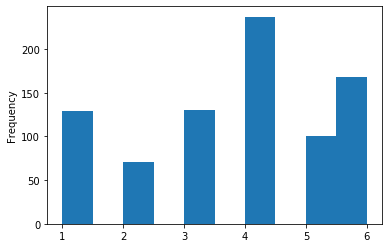

In [50]:
starwarsdf['Ranking1'].plot(kind='hist',bins=10)
plt.title('Ranking1')
plt.xlabel('ranks')

In [51]:
# Task 2: Data Exploration
# 1. Explore the survey question: \textit{Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.	(Star Wars: Episode I  The Phantom Menace; Star Wars: Episode II  Attack of the Clones; Star Wars: Episode III  Revenge of the Sith;	Star Wars: Episode IV  A New Hope; Star Wars: Episode V The Empire Strikes Back; Star Wars: Episode VI Return of the Jedi)}, then analysis how people rate Star Wars Movies. 


#Code goes after this line by adding cells

In [52]:
import matplotlib.pyplot as plt

<BarContainer object of 6 artists>

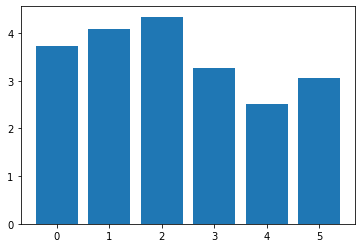

In [53]:
plt.bar(range(6), starwarsdf[starwarsdf.columns[9:15]].mean())

<BarContainer object of 6 artists>

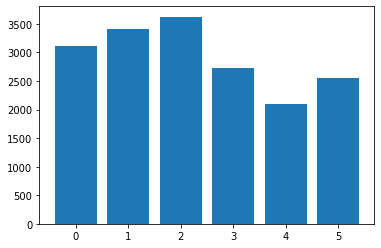

In [54]:
plt.bar(range(6), starwarsdf[starwarsdf.columns[9:15]].sum())

In [55]:
males = starwarsdf[starwarsdf["Gender"] == "Male"]
females = starwarsdf[starwarsdf["Gender"] == "Female"]

<BarContainer object of 6 artists>

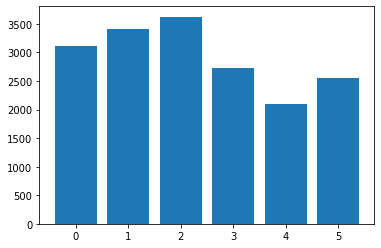

In [56]:
plt.bar(range(6), starwarsdf[males.columns[9:15]].sum())

<BarContainer object of 6 artists>

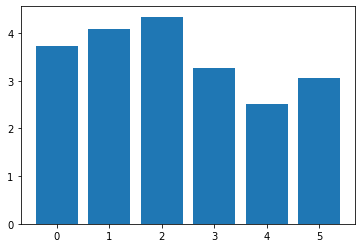

In [57]:
plt.bar(range(6), starwarsdf[males.columns[9:15]].mean())

<BarContainer object of 6 artists>

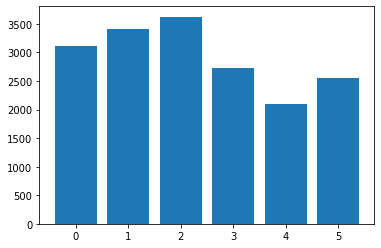

In [58]:
plt.bar(range(6), starwarsdf[females.columns[9:15]].sum())

<BarContainer object of 6 artists>

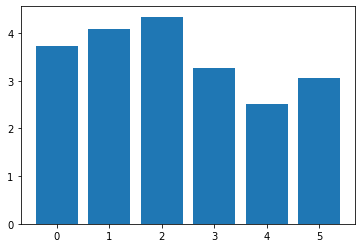

In [59]:
plt.bar(range(6), starwarsdf[females.columns[9:15]].mean())

In [60]:
fans= starwarsdf[starwarsdf["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
not_a_fan= starwarsdf[starwarsdf["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

<BarContainer object of 6 artists>

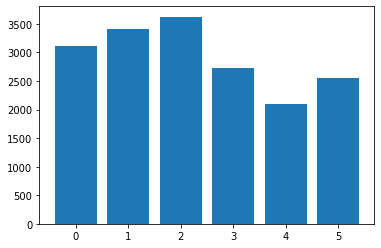

In [61]:
plt.bar(range(6), starwarsdf[fans.columns[9:15]].sum())

<BarContainer object of 6 artists>

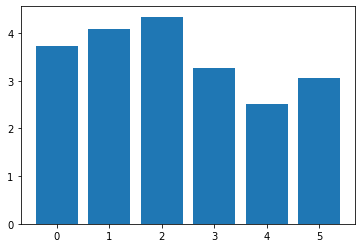

In [62]:
plt.bar(range(6), starwarsdf[fans.columns[9:15]].mean())

<BarContainer object of 6 artists>

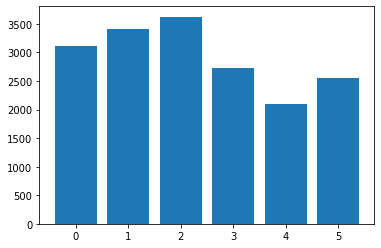

In [63]:
plt.bar(range(6), starwarsdf[not_a_fan.columns[9:15]].sum())

<BarContainer object of 6 artists>

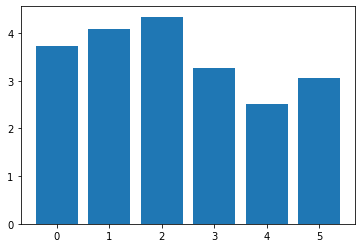

In [64]:
plt.bar(range(6), starwarsdf[not_a_fan.columns[9:15]].mean())

In [65]:
startrekfans= starwarsdf[starwarsdf["Do you consider yourself to be a fan of the Star Trek franchise?"] == True]
nonstartrekfans = starwarsdf[starwarsdf["Do you consider yourself to be a fan of the Star Trek franchise?"] == False]

<BarContainer object of 6 artists>

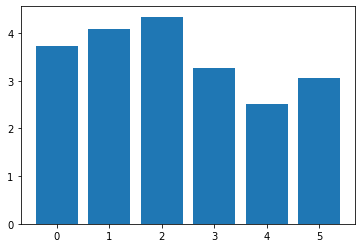

In [66]:
plt.bar(range(6), starwarsdf[startrekfans.columns[9:15]].mean())

<BarContainer object of 6 artists>

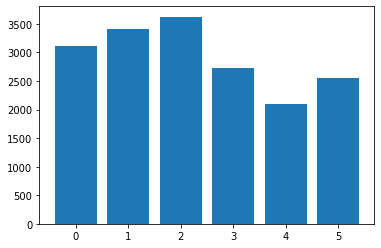

In [67]:
plt.bar(range(6), starwarsdf[startrekfans.columns[9:15]].sum())

<BarContainer object of 6 artists>

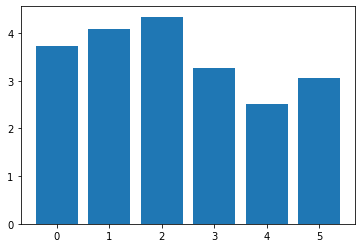

In [68]:
plt.bar(range(6), starwarsdf[nonstartrekfans.columns[9:15]].mean())


<BarContainer object of 6 artists>

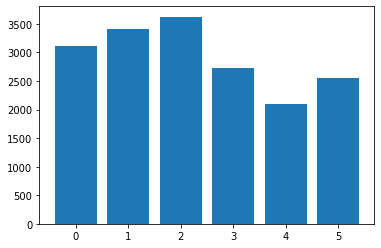

In [69]:
plt.bar(range(6), starwarsdf[nonstartrekfans.columns[9:15]].sum())


In [70]:
# Task 2: Data Exploration
# 3. Explore whether there are relationship between people's demographics (Gender, Age, Household Income, Education, Location) and their attitude to Start War characters. 

In [71]:
starwarsdf['Gender'].value_counts()

FEMALE    549
MALE      497
Name: Gender, dtype: int64

In [72]:
starwarsdf['Age'].value_counts()

45-60    291
> 60     269
30-44    268
18-29    217
Name: Age, dtype: int64

In [73]:
starwarsdf['Household Income'].value_counts()

$50,000 - $99,999      298
$25,000 - $49,999      186
$100,000 - $149,999    141
$0 - $24,999           138
$150,000+               95
Name: Household Income, dtype: int64

In [74]:
starwarsdf['Education'].value_counts()

SOME COLLEGE OR ASSOCIATE DEGREE    328
BACHELOR DEGREE                     321
GRADUATE DEGREE                     275
HIGH SCHOOL DEGREE                  105
LESS THAN HIGH SCHOOL DEGREE          7
Name: Education, dtype: int64

In [75]:
starwarsdf['Location (Census Region)'].value_counts()

EAST NORTH CENTRAL    181
PACIFIC               175
SOUTH ATLANTIC        170
MIDDLE ATLANTIC       122
WEST SOUTH CENTRAL    110
WEST NORTH CENTRAL     93
MOUNTAIN               79
NEW ENGLAND            75
EAST SOUTH CENTRAL     38
Name: Location (Census Region), dtype: int64

In [76]:
starwarsdf[starwarsdf.columns[15:29]][:5]

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
1,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,UNFAMILIAR (N/A),UNFAMILIAR (N/A),VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,UNFAMILIAR (N/A),UNFAMILIAR (N/A),UNFAMILIAR (N/A),UNFAMILIAR (N/A),UNFAMILIAR (N/A),UNFAMILIAR (N/A),UNFAMILIAR (N/A),UNFAMILIAR (N/A),UNFAMILIAR (N/A)
4,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT UNFAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY
5,VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT UNFAVORABLY,VERY FAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY


In [77]:
starwarsdf = starwarsdf.rename(columns={
        "Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.":"Rate_Han_Solo",
       "Unnamed: 16":"Rate_Luke_Skywalker",
        "Unnamed: 17":"Rate_Princess_Leia_Organa",
        "Unnamed: 18":"Rate_Anakin_Skywalker",
        "Unnamed: 19":"Rate_Obi_Wan_Kenobi",
        "Unnamed: 20":"Rate_Emperor_Palpatine",
        "Unnamed: 21":"Rate_Darth_Vader",
        "Unnamed: 22":"Rate_Lando_Calrissian",
        "Unnamed: 23":"Rate_Boba_Fett",
        "Unnamed: 24":"Rate_C-3P0",
        "Unnamed: 25":"Rate_R2_D2",
        "Unnamed: 26":"Rate_Jar_Binks",
        "Unnamed: 27":"Rate_Padme_Amidala",
        "Unnamed: 28":"Rate_Yoda"    
        })

In [78]:
favorable_response ={}

In [79]:
favorable_response['Han_Solo'] = starwarsdf['Rate_Han_Solo'].value_counts()['VERY FAVORABLY']
favorable_response['Luke_Skywalker'] = starwarsdf['Rate_Luke_Skywalker'].value_counts()['VERY FAVORABLY']
favorable_response['Han_Solo'] = starwarsdf['Rate_Han_Solo'].value_counts()['VERY FAVORABLY']
favorable_response['Princess_Leia_Organa'] = starwarsdf['Rate_Princess_Leia_Organa'].value_counts()['VERY FAVORABLY']
favorable_response['Obi_Wan_Kenobi'] = starwarsdf['Rate_Obi_Wan_Kenobi'].value_counts()['VERY FAVORABLY']
favorable_response['Emperor_Palpatine'] = starwarsdf['Rate_Emperor_Palpatine'].value_counts()['VERY FAVORABLY']
favorable_response['Darth_Vader'] = starwarsdf['Rate_Darth_Vader'].value_counts()['VERY FAVORABLY']
favorable_response['Lando_Calrissian'] = starwarsdf['Rate_Lando_Calrissian'].value_counts()['VERY FAVORABLY']
favorable_response['Boba_Fett'] = starwarsdf['Rate_Boba_Fett'].value_counts()['VERY FAVORABLY']
favorable_response['C-3P0'] = starwarsdf['Rate_C-3P0'].value_counts()['VERY FAVORABLY']
favorable_response['Jar_Binks'] = starwarsdf['Rate_Jar_Binks'].value_counts()['VERY FAVORABLY']
favorable_response['R2_D2'] = starwarsdf['Rate_R2_D2'].value_counts()['VERY FAVORABLY']
favorable_response['Padme_Amidala'] = starwarsdf['Rate_Padme_Amidala'].value_counts()['VERY FAVORABLY']
favorable_response['Yoda'] = starwarsdf['Rate_Yoda'].value_counts()['VERY FAVORABLY']


In [80]:
favorable_response

{'Han_Solo': 610,
 'Luke_Skywalker': 552,
 'Princess_Leia_Organa': 547,
 'Obi_Wan_Kenobi': 591,
 'Emperor_Palpatine': 110,
 'Darth_Vader': 310,
 'Lando_Calrissian': 142,
 'Boba_Fett': 138,
 'C-3P0': 474,
 'Jar_Binks': 112,
 'R2_D2': 562,
 'Padme_Amidala': 168,
 'Yoda': 605}

In [81]:
Unfavourable_response ={}

In [82]:
Unfavourable_responseUnfavourable_response ={}['Han_Solo'] = starwarsdf['Rate_Han_Solo'].value_counts()['VERY UNFAVORABLY']
Unfavourable_response['Luke_Skywalker'] = starwarsdf['Rate_Luke_Skywalker'].value_counts()['VERY UNFAVORABLY']
Unfavourable_response['Han_Solo'] = starwarsdf['Rate_Han_Solo'].value_counts()['VERY UNFAVORABLY']
Unfavourable_response['Princess_Leia_Organa'] = starwarsdf['Rate_Princess_Leia_Organa'].value_counts()['VERY UNFAVORABLY']
Unfavourable_response['Obi_Wan_Kenobi'] = starwarsdf['Rate_Obi_Wan_Kenobi'].value_counts()['VERY UNFAVORABLY']
Unfavourable_response['Emperor_Palpatine'] = starwarsdf['Rate_Emperor_Palpatine'].value_counts()['VERY UNFAVORABLY']
Unfavourable_response['Darth_Vader'] = starwarsdf['Rate_Darth_Vader'].value_counts()['VERY UNFAVORABLY']
Unfavourable_response['Lando_Calrissian'] = starwarsdf['Rate_Lando_Calrissian'].value_counts()['VERY UNFAVORABLY']
Unfavourable_response['Boba_Fett'] = starwarsdf['Rate_Boba_Fett'].value_counts()['VERY UNFAVORABLY']
Unfavourable_response['C-3P0'] = starwarsdf['Rate_C-3P0'].value_counts()['VERY UNFAVORABLY']
Unfavourable_response['Jar_Binks'] = starwarsdf['Rate_Jar_Binks'].value_counts()['VERY UNFAVORABLY']
Unfavourable_response['R2_D2'] = starwarsdf['Rate_R2_D2'].value_counts()['VERY UNFAVORABLY']
Unfavourable_response['Padme_Amidala'] = starwarsdf['Rate_Padme_Amidala'].value_counts()['VERY UNFAVORABLY']
Unfavourable_response['Yoda'] = starwarsdf['Rate_Yoda'].value_counts()['VERY UNFAVORABLY']


In [83]:
Unfavourable_response

{'Luke_Skywalker': 3,
 'Han_Solo': 1,
 'Princess_Leia_Organa': 6,
 'Obi_Wan_Kenobi': 7,
 'Emperor_Palpatine': 124,
 'Darth_Vader': 149,
 'Lando_Calrissian': 8,
 'Boba_Fett': 45,
 'C-3P0': 7,
 'Jar_Binks': 204,
 'R2_D2': 6,
 'Padme_Amidala': 34,
 'Yoda': 8}

In [84]:
Neutral_response ={}

In [85]:
Neutral_response['Han_Solo'] = starwarsdf['Rate_Han_Solo'].value_counts()['NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)']
Neutral_response['Luke_Skywalker'] = starwarsdf['Rate_Luke_Skywalker'].value_counts()['NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)']
Neutral_response['Han_Solo'] = starwarsdf['Rate_Han_Solo'].value_counts()['NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)']
Neutral_response['Princess_Leia_Organa'] = starwarsdf['Rate_Princess_Leia_Organa'].value_counts()['NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)']
Neutral_response['Obi_Wan_Kenobi'] = starwarsdf['Rate_Obi_Wan_Kenobi'].value_counts()['NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)']
Neutral_response['Emperor_Palpatine'] = starwarsdf['Rate_Emperor_Palpatine'].value_counts()['NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)']
Neutral_response['Darth_Vader'] = starwarsdf['Rate_Darth_Vader'].value_counts()['NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)']
Neutral_response['Lando_Calrissian'] = starwarsdf['Rate_Lando_Calrissian'].value_counts()['NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)']
Neutral_response['Boba_Fett'] = starwarsdf['Rate_Boba_Fett'].value_counts()['NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)']

Neutral_response['C-3P0'] = starwarsdf['Rate_C-3P0'].value_counts()['NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)']
Neutral_response['Jar_Binks'] = starwarsdf['Rate_Jar_Binks'].value_counts()['NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)']
Neutral_response['R2_D2'] = starwarsdf['Rate_R2_D2'].value_counts()['NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)']
Neutral_response['Padme_Amidala'] = starwarsdf['Rate_Padme_Amidala'].value_counts()['NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)']
Neutral_response['Yoda'] = starwarsdf['Rate_Yoda'].value_counts()['NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)']


In [86]:
Neutral_response

{'Han_Solo': 44,
 'Luke_Skywalker': 38,
 'Princess_Leia_Organa': 48,
 'Obi_Wan_Kenobi': 43,
 'Emperor_Palpatine': 213,
 'Darth_Vader': 84,
 'Lando_Calrissian': 236,
 'Boba_Fett': 248,
 'C-3P0': 79,
 'Jar_Binks': 164,
 'R2_D2': 57,
 'Padme_Amidala': 207,
 'Yoda': 51}

('Han_Solo', 'Yoda', 'Obi_Wan_Kenobi', 'R2_D2', 'Luke_Skywalker', 'Princess_Leia_Organa', 'C-3P0', 'Darth_Vader', 'Padme_Amidala', 'Lando_Calrissian', 'Boba_Fett', 'Jar_Binks', 'Emperor_Palpatine')
(610, 605, 591, 562, 552, 547, 474, 310, 168, 142, 138, 112, 110)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


<BarContainer object of 13 artists>

([<matplotlib.axis.XTick at 0x2ef5eac2188>,
 <a list of 13 Text xticklabel objects>)

Text(0, 0.5, 'Number of ratings')

Text(0.5, 0, 'Character in movies')

Text(0.5, 1.0, 'Very Favorable Characters')

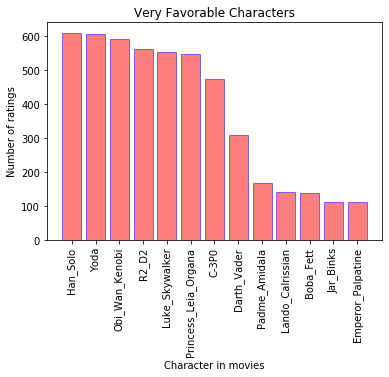

In [87]:
lists = sorted(favorable_response.items(), key=lambda pg: pg[1], reverse=True)

x, y = zip(*lists)
print(x)
print(y)

y_pos = np.arange(len(x))
print(y_pos)
plt.bar(y_pos, y, align='center', color=['red'], alpha=0.5,label='Highly Favorable', edgecolor='blue')
plt.xticks(y_pos, x,rotation=90)
plt.ylabel('Number of ratings')
plt.xlabel('Character in movies')

plt.title('Very Favorable Characters')

plt.show()

('Jar_Binks', 'Darth_Vader', 'Emperor_Palpatine', 'Boba_Fett', 'Padme_Amidala', 'Lando_Calrissian', 'Yoda', 'Obi_Wan_Kenobi', 'C-3P0', 'Princess_Leia_Organa', 'R2_D2', 'Luke_Skywalker', 'Han_Solo')
(204, 149, 124, 45, 34, 8, 8, 7, 7, 6, 6, 3, 1)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


<BarContainer object of 13 artists>

([<matplotlib.axis.XTick at 0x2ef5eac3148>,
 <a list of 13 Text xticklabel objects>)

Text(0, 0.5, 'Number of ratings')

Text(0.5, 0, 'Character in movies')

Text(0.5, 1.0, 'Very Unfavorable Characters')

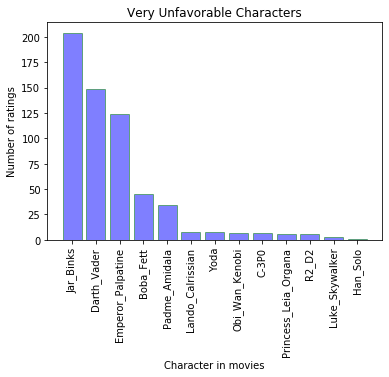

In [88]:
lists = sorted(Unfavourable_response.items(), key=lambda pg: pg[1], reverse=True)

x, y = zip(*lists)
print(x)
print(y)

y_pos = np.arange(len(x))
print(y_pos)
plt.bar(y_pos, y, align='center', color=['blue'], alpha=0.5,label='Highly Unfavorable', edgecolor='green')
plt.xticks(y_pos, x,rotation=90)
plt.ylabel('Number of ratings')
plt.xlabel('Character in movies')

plt.title('Very Unfavorable Characters')

plt.show()

('Boba_Fett', 'Lando_Calrissian', 'Emperor_Palpatine', 'Padme_Amidala', 'Jar_Binks', 'Darth_Vader', 'C-3P0', 'R2_D2', 'Yoda', 'Princess_Leia_Organa', 'Han_Solo', 'Obi_Wan_Kenobi', 'Luke_Skywalker')
(248, 236, 213, 207, 164, 84, 79, 57, 51, 48, 44, 43, 38)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


<BarContainer object of 13 artists>

([<matplotlib.axis.XTick at 0x2ef5ea7d8c8>,
 <a list of 13 Text xticklabel objects>)

Text(0, 0.5, 'Number of ratings')

Text(0.5, 0, 'Character in movies')

Text(0.5, 1.0, 'Neutral Characters')

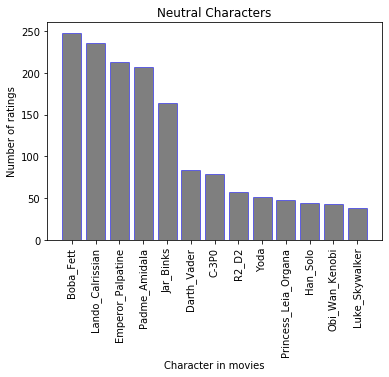

In [89]:
lists = sorted(Neutral_response.items(), key=lambda pg: pg[1], reverse=True)

x, y = zip(*lists)
print(x)
print(y)

y_pos = np.arange(len(x))
print(y_pos)
plt.bar(y_pos, y, align='center', color=['black'], alpha=0.5,label='Highly Unfavorable', edgecolor='blue')
plt.xticks(y_pos, x,rotation=90)
plt.ylabel('Number of ratings')
plt.xlabel('Character in movies')

plt.title('Neutral Characters')

plt.show()